In [27]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

In [17]:
df_can.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'], inplace=True);
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True);
df_can.set_index('Country', inplace=True);
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Text(2001, 6000, '2010 Earthquake')

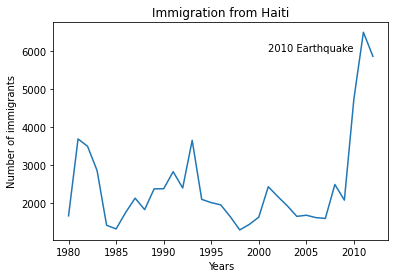

In [29]:
df_can.loc['Haiti', range(1980, 2013)].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(2001, 6000, '2010 Earthquake') # see note below

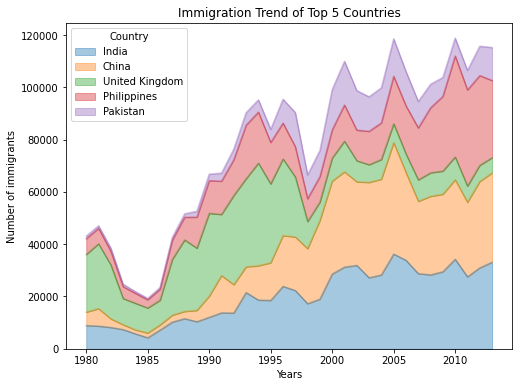

In [149]:
df_can['Total'] = df_can.loc[:,range(1980,2014)].sum(axis=1)
df_top_five = df_can.sort_values(by=['Total'], ascending=False).head()
df_top_five = df_top_five[range(1980,2014)].transpose()
df_top_five.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'}, inplace=True);
df_top_five.plot(kind='area', alpha=.4, figsize=(8,6));
plt.title('Immigration Trend of Top 5 Countries');
plt.ylabel('Number of immigrants');
plt.xlabel('Years');

Text(0, 0.5, 'Number of Countries')

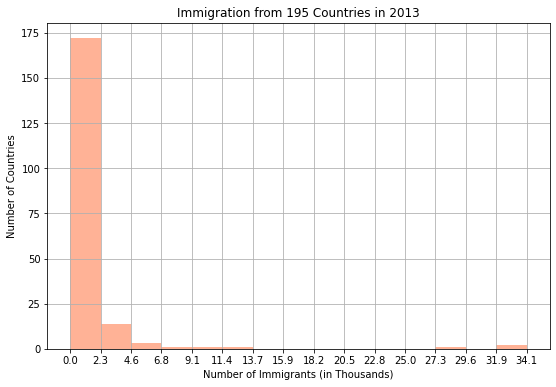

In [98]:
count, bin_edges = np.histogram(df_can[2013],15)

ax = df_can[2013].plot(
    kind='hist', bins=15,
    figsize=(9, 6), alpha=.6,
    color=['coral', 'darkslateblue', 'mediumseagreen'],
)

plt.xticks(ticks=bin_edges, labels=list(map(lambda x:'{0:.1f}'.format(x/1000), bin_edges)))
plt.grid()
plt.title('Immigration from 195 Countries in 2013')
plt.xlabel('Number of Immigrants (in Thousands)')
plt.ylabel('Number of Countries')

Text(28, 30, '2008 - 2011 Financial Crisis')

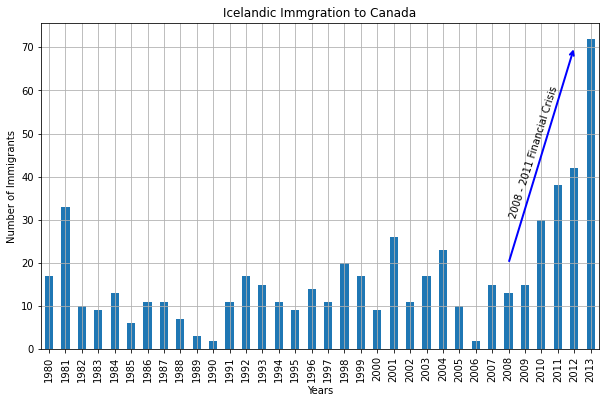

In [106]:
# count, bin_edges = np.histogram(df_can[2013])
ax = df_can.loc['Iceland', range(1980,2014)].plot(
    kind='bar',
    figsize=(10, 6)
)
# plt.xticks(ticks=bin_edges, labels=list(map(lambda x:'{0:.1f}'.format(x/1000), bin_edges)))
plt.grid()
plt.title('Icelandic Immgration to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

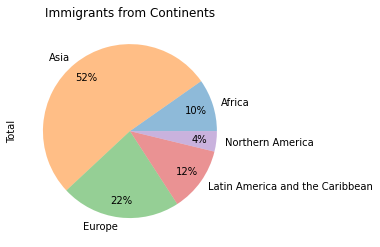

In [127]:
df_continents = df_can.groupby('Continent').sum().head()
ax = df_continents['Total'].plot(
    kind='pie', autopct='%1.0f%%', pctdistance=0.8,
    wedgeprops={'alpha':0.5}
)

plt.title('Immigrants from Continents')
plt.gcf().set_facecolor('white')

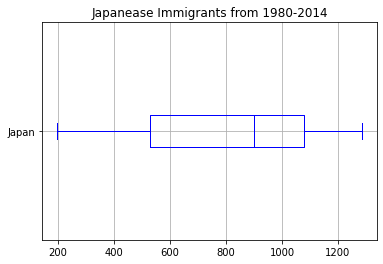

In [160]:
df_japan = df_can.loc[['Japan'], range(1980,2014)].transpose()
ax = df_japan.plot(kind='box', color='blue', vert=False)
# ax.set_facecolor('xkcd:pale aqua')
plt.title('Japanease Immigrants from 1980-2014')
plt.grid()
# plt.gcf().set_facecolor('xkcd:cream')

Text(0, 0.5, 'Number of Immigrants')

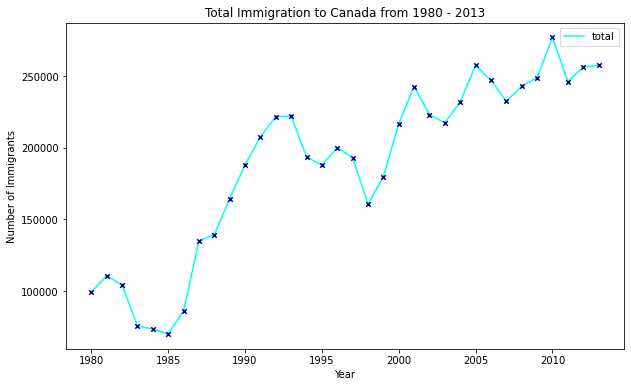

In [201]:
df_total = df_can.loc[:, range(1980,2014)].transpose().sum(axis='columns')
df_total = df_total.to_frame();
df_total.reset_index(inplace=True)
df_total.rename(columns={'index': 'year', 0: 'total'}, inplace=True)

ax = df_total.plot(kind='scatter', x='year', y='total', color='darkblue', marker='x', figsize=(10, 6))
df_total.plot(kind='line', x='year', y='total', color='cyan', zorder=0, ax=ax)
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')


In [165]:
df_total

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432
